# My Notes

1. How to implement k-means Clustering ?
2. How to implement Agglomerative Clustering ?
3. How to create a project from end-to-end on ML?

# K-Means Clustering

In [1]:
# Step -1: We have to import the data from csv

import pandas as pd

dataset=pd.read_csv('Mall_Customers.csv')
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [2]:
# Step - 2: Which columns impact more in the dataset 
# Annual Income and Sepnding Score 

X=dataset.iloc[:, [3,4]].values

In [3]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# K-means

K- number of clusters that you want to make

1 to 10 clusters

k=3 (c1,c2,c3)

100 datapoints

Step - 1: it will randomly select 3 data points, assuming that 3 datapoints are the centroids of the cluster.
3 datapoints - centroids for 3 clusters

C1 - (X1,Y1) - Centroid
C2 - (X2,Y2) - Centroid
C3 - (X3,Y3) - Centroid

Step - 2: The remaining datapoints say n-3 datapoints will be joining the cluster based on the distance between them. 

97 datapoints will be joining the 3 clusters based on the distance between it.

30 datapoints - C1 (31) <br/>
37 datapoints - C2 (38) <br/>
30 datapoints - C3 (31) <br/>

Step - 3: A new centroid will be created within each cluster, step-2 will be iterated


In [4]:
# Randomly (1 to 10) Clusters

from sklearn.cluster import KMeans

a=[] # list
for i in range(1,11): 
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=1)
  kmeans.fit(X)
  a.append(kmeans.inertia_)


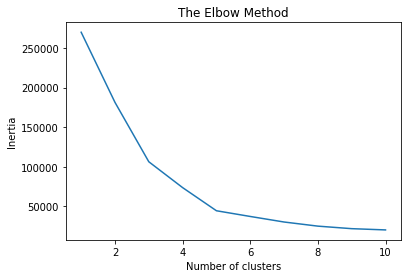

In [5]:
import matplotlib.pyplot as plt

# no_of_clusters Vs inertia
plt.plot(range(1,11),a)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [7]:
kmeans=KMeans(n_clusters=5, init="k-means++",random_state=1)
y_kmeans=kmeans.fit_predict(X)

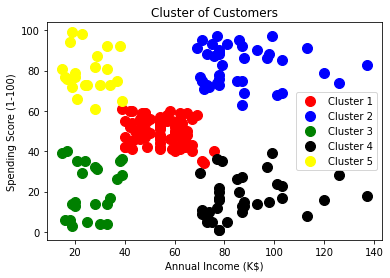

In [8]:
# Visualizing the Clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='yellow',label='Cluster 5')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

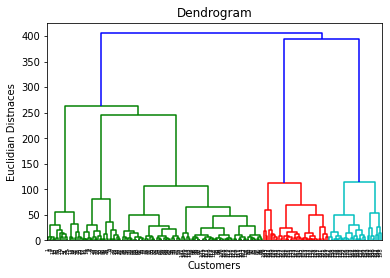

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian Distnaces')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

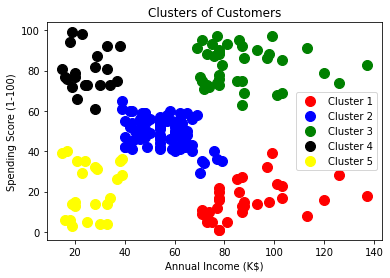

In [13]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],100,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],100,c='blue',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],100,c='green',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],100,c='black',label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],100,c='yellow',label='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()